In [40]:
import librosa

In [41]:
def load_audio(audio_path):

    x, sr = librosa.load(audio_path)
    print(type(x), type(sr))
    print(x.shape, sr)

    return x, sr

In [42]:
base_path = './Data/genres_original'
file = 'blues/blues.00000.wav'
audio_path = f'{base_path}/{file}'
(x, sr) = load_audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


## Waveform

In [43]:
import matplotlib.pyplot as plt
import librosa.display

In [44]:
def visualise_wave(x, sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)

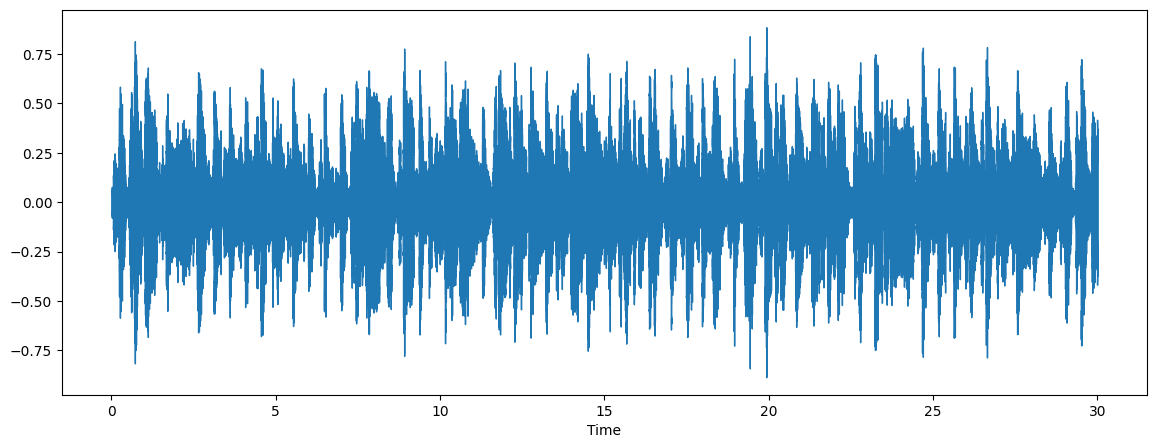

In [58]:
visualise_wave(x, sr)


## Spectrogram

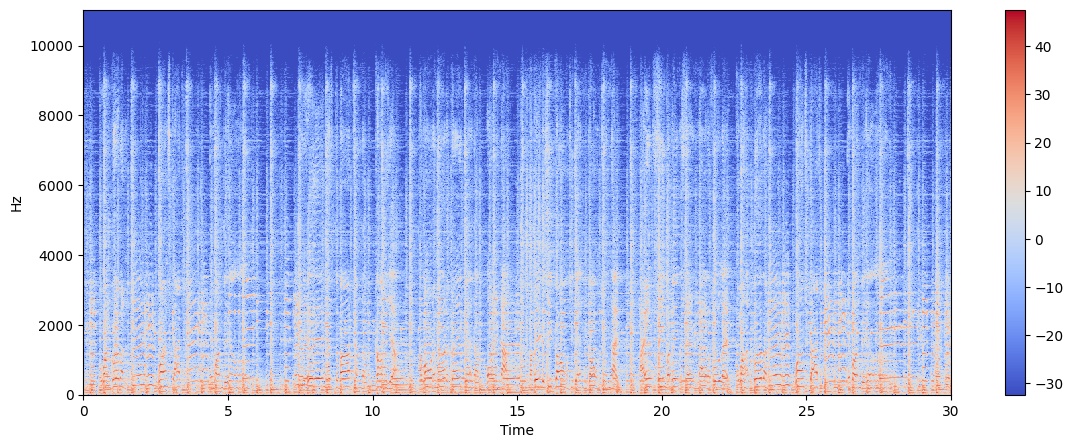

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


In [ ]:
import numpy as np

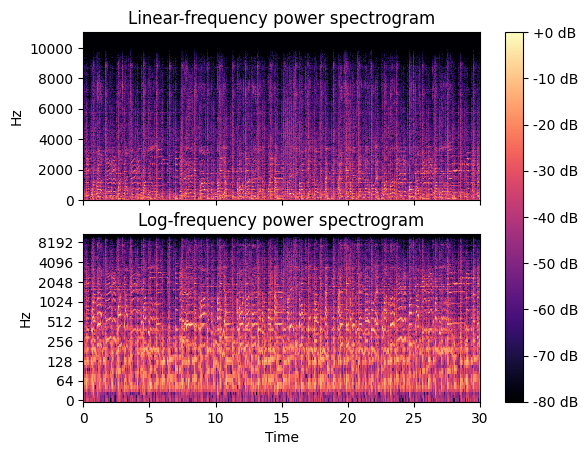

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex='all')
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")



## Write wav file

In [63]:
import soundfile

In [64]:
soundfile.write(f'./processed_data/{file}', x, sr)

## Create wav

In [65]:

import IPython.display as ipd
ipd.Audio(audio_path)

sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
soundfile.write(f'./processed_data/tone_220.wav', x, sr)
ipd.Audio(x, rate=sr) # load a NumPy array



## Feature extraction

### Zero-Crossing Rate

The Zero-Crossing Rate (ZCR) is a fundamental attribute used in audio feature extraction. It refers to the rate at which an audio signal changes its polarity, crossing the zero amplitude point. In simpler terms, it is the number of times a waveform transitions from positive to negative or vice versa within a specific time frame.

ZCR is an essential parameter for analysing and characterising audio signals in various applications such as speech recognition, music information retrieval, and sound classification. It is particularly useful for distinguishing between voiced and unvoiced speech segments or identifying percussive elements in music.

In general, higher ZCR values correspond to noisier or more rapidly varying sounds – typically observed in unvoiced speech – while lower ZCR values are associated with smoother signals with fewer polarity changes – often prevalent in voiced speech or sustained musical notes. However, it is important to note that Zero-Crossing Rate alone may not suffice for fully characterising complex audio signals. It must be used with other features, such as spectral attributes and energy-based measurements, for improved accuracy.

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


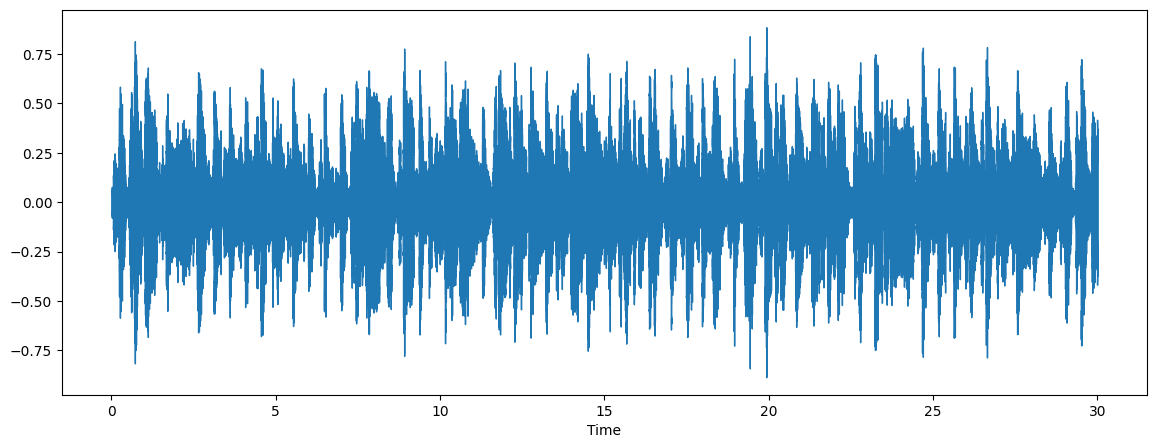

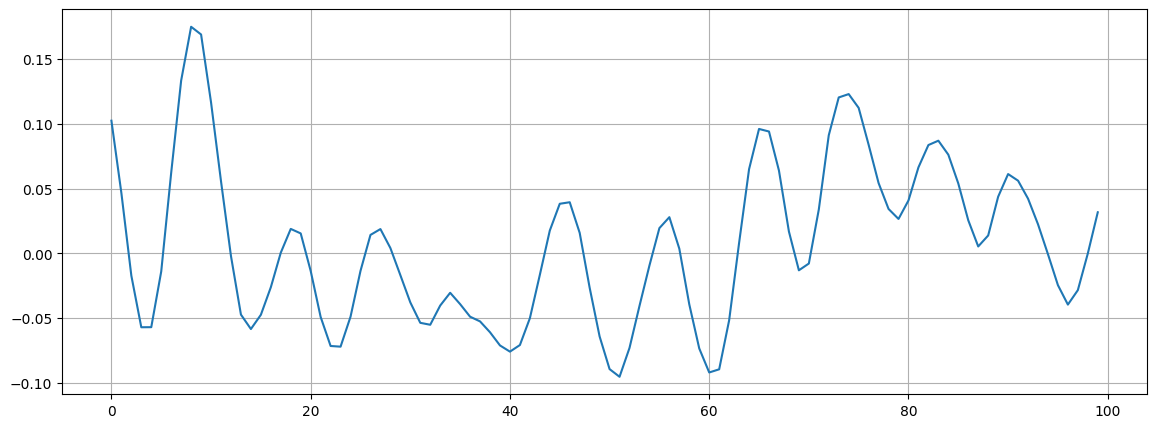

In [66]:
(x, sr) = load_audio(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

#### Count the number of 0 crossings


In [67]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))


16


### Spectral Centroid

The Spectral Centroid is a significant parameter in the field of audio feature extraction, particularly when analysing and characterising sound signals. It is a measure that quantifies the centre of mass or "centre of gravity" of an audio signal's frequency spectrum, providing valuable insight into the perceived brightness or tonal quality of a sound.

In simpler terms, it refers to a point in which the distribution of energy across various frequencies is balanced. Lower values for Spectral Centroid typically correspond to darker or muffled sounds dominated by low-frequency content, while higher values are associated with brighter and sharper sounds primarily containing high-frequency components.

Spectral Centroid can be used as an effective tool for identifying and differentiating diverse types of musical instruments, genres or even emotions within music — as each tends to exhibit distinctive spectral characteristics. Furthermore, it plays an essential role in various applications such as music classification systems, automatic tagging algorithms and machine learning models designed for music recommendations or emotion recognition.

In summary, Spectral Centroid serves as an invaluable feature when examining audio signals due to its ability to encapsulate information about their distribution across different frequencies. This allows researchers and developers alike to gain deeper insights into numerous aspects related to sound analysis and synthesis.


In [68]:
import librosa.feature

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(1293,)

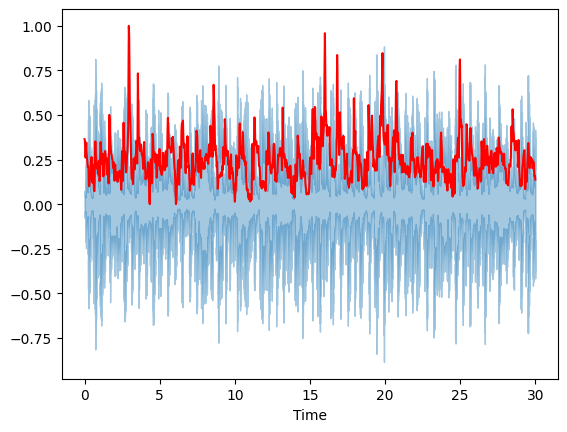

In [69]:
import sklearn
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


### Spectral Rolloff

Spectral Rolloff refers to a specific feature in audio feature extraction, commonly used in digital signal processing and music information retrieval. It is a measure of the frequency below which a specified percentage (typically 85% or 95%) of the total spectral energy resides. In essence, it serves as an indicator of the high-frequency content within an audio signal.

Analysing and extracting such features from audio signals can provide valuable insights into various aspects, such as timbre, pitch perception and tonality. Consequently, Spectral Rolloff plays a crucial role in applications like speech recognition, genre classification, instrument identification and music recommendation systems.

(1293,)

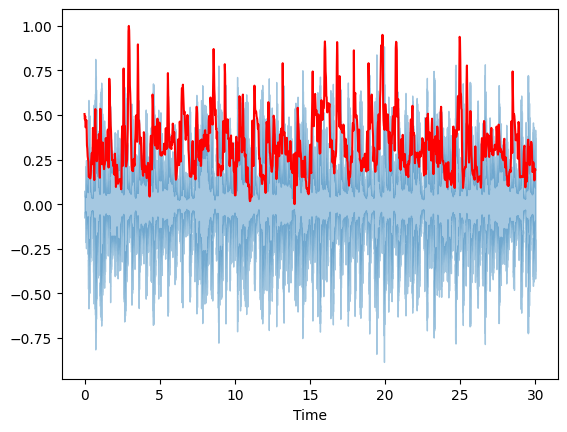

In [70]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')


### Mel-Frequency Cepstral Coefficients (MFCCs)

Mel-frequency cepstral coefficients (MFCCs) refer to a widely used technique in audio feature extraction, particularly for applications such as speech and music signal processing. MFCCs serve as a compact representation of an audio signal's spectral characteristics by modelling the human auditory system's response to sound frequencies.

The method involves several stages:

1. Pre-emphasis: The input audio signal is first pre-emphasised using a filter, which amplifies higher frequencies to compensate for the natural decay in amplitude observed in these frequency bands.

2. Framing: The pre-emphasised signal is then segmented into short frames or windows, typically with an overlap between consecutive frames to ensure continuity of information.

3. Windowing: Each frame is multiplied by a window function, such as a Hamming window, which reduces artefacts caused by discontinuities at the edges of each frame.

4. Fast Fourier Transform (FFT): The windowed frames are transformed into their frequency domain representation using FFT, resulting in complex-valued spectra that capture both magnitude and phase information for each frequency component present within the frame.

5. Mel-scale filtering: Taking only the magnitudes from these spectra, they are then passed through a set of overlapping triangular filters spaced across the Mel-frequency scale – which models human perception of pitch – producing "Mel-spectra" where each bin represents an aggregated energy value within its corresponding filter range.

6. Discrete Cosine Transform (DCT): Lastly, DCT is applied to extract cepstral coefficients from these log-Mel spectra; typically, 12-20 MFCCs are retained per frame while discarding higher-order coefficients that correspond less closely with perceptual cues utilised by humans when listening to sound signals.

In summary, MFCCs provide an efficient encoding scheme that effectively captures salient properties from audio signals while accounting for human perceptual sensitivities in terms of critical bandwidths and logarithmic perception of frequency. This makes them a powerful tool for various audio-related applications, such as speech recognition, speaker identification, and music genre classification.

(20, 1293)


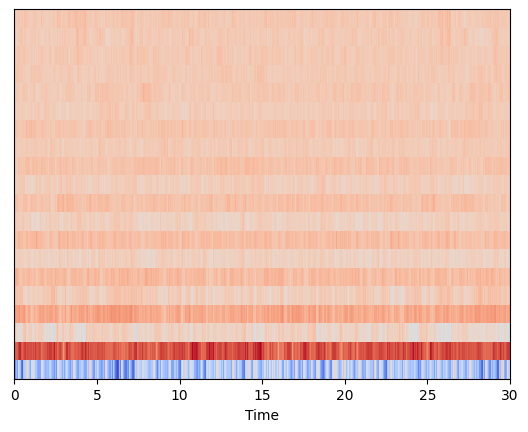

In [71]:
# librosa.display.waveshow(x, sr=sr)

mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[ 0.0000000e+00  0.0000000e+00  5.9005369e-09 -5.9005369e-09
 -5.9005369e-09  7.3756716e-09  0.0000000e+00  1.1801074e-08
  0.0000000e+00  5.9005369e-09  0.0000000e+00  8.8508054e-09
 -8.8508054e-09  8.8508054e-09  0.0000000e+00  5.9005369e-09
 -5.9005369e-09 -8.8508054e-09  0.0000000e+00 -1.4751342e-09]
[1.0000001 1.        1.        1.        1.        0.9999999 1.
 1.        1.0000001 0.9999999 1.        1.        0.9999998 1.
 1.        1.        1.        1.0000001 1.        0.9999999]


/Users/seancooper/Library/Caches/pypoetry/virtualenvs/analyse-audio-az-kp8P3-py3.9/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/seancooper/Library/Caches/pypoetry/virtualenvs/analyse-audio-az-kp8P3-py3.9/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


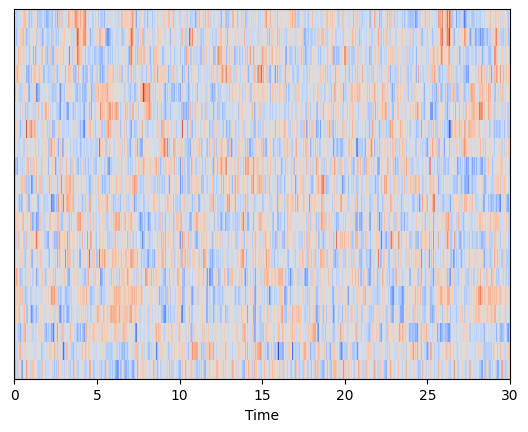

In [72]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


### Chroma Frequencies

Chroma frequencies, also known as chroma feature representation, is a way to extract musical information from an audio signal. It represents the distribution of energy across the 12 pitch classes in the Western musical scale.

Chroma frequencies are useful for analyzing the harmonic content of music, as they can be used to identify chord progressions, melody lines, and tonal centers. They are often used in music information retrieval systems, such as automatic music transcription, genre classification, and content-based music retrieval.

One of the main advantages of chroma features is their ability to represent tonality information without being affected by octave displacement, which means that notes with different frequencies but the same pitch class are treated equally. This is particularly useful for analyzing polyphonic music, where multiple notes are played simultaneously.

In summary, chroma frequencies provide a compact and musically meaningful representation of the harmonic content of music, which can be used for a variety of music analysis tasks.

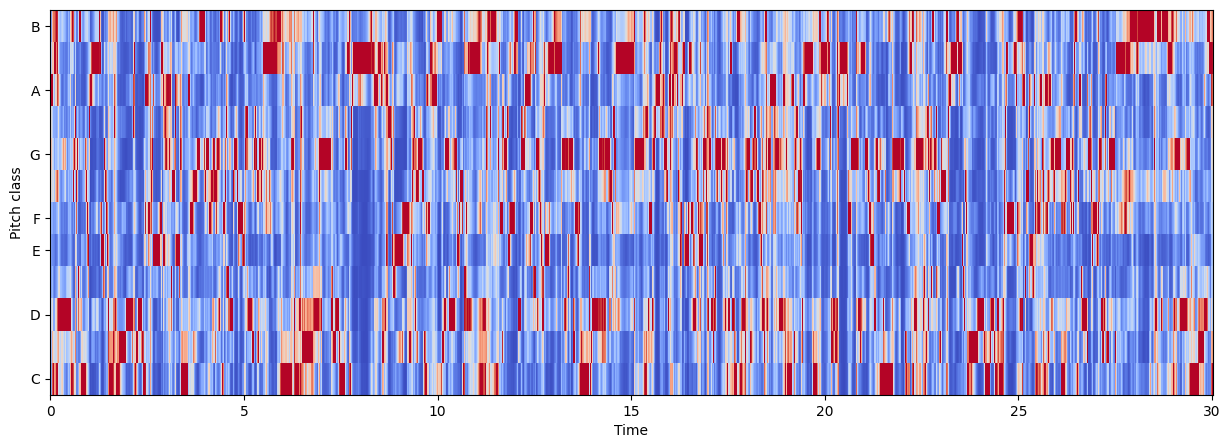

In [73]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
